# Tutorial on Bayesian Inference

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1) Extragalactic radio sources

## 2) Modelling and inferring stellar properties

In [110]:
T0 = 10
sigma_T = 1
A = 1
L = np.linspace(1.5,2, 100000)

P_L = (1/np.sqrt(2*np.pi*sigma_T**2))* \
    (np.exp((-0.5)*((L/(sigma_T*A))**4 - T0)**2 / sigma_T**2))* \
    (1/4*(L/(sigma_T*A))**(-3/4))

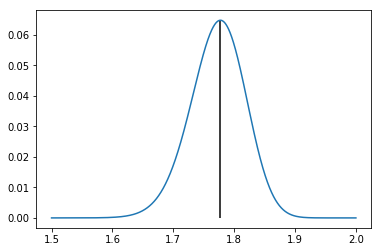

In [137]:
plt.plot(L, P_L)
plt.vlines(L[np.where(P_L == max(P_L))], 0, max(P_L))

In [134]:
L[np.where(P_L == max(P_L))]

array([1.77744277])

In [158]:
ran = np.random.choice(P_L, 100)

In [159]:
ran

array([3.02189482e-04, 9.47791336e-03, 2.41422165e-03, 4.36134362e-02,
       8.34671048e-03, 2.29311367e-03, 1.90990709e-05, 4.28897335e-03,
       2.46057235e-09, 5.04080741e-08, 1.07417421e-07, 1.36052187e-02,
       6.47765217e-02, 2.05948940e-06, 1.36436983e-06, 5.03683677e-02,
       5.54460737e-02, 2.92759043e-06, 6.38634899e-07, 1.25040718e-03,
       3.68148770e-03, 1.06011760e-05, 2.60657076e-02, 1.81160869e-04,
       9.18625396e-06, 3.08424900e-04, 8.05189245e-04, 6.44562793e-02,
       3.99658994e-02, 9.74711784e-04, 3.27890908e-02, 2.96567613e-02,
       2.90342078e-09, 2.88947877e-05, 5.56798691e-02, 3.94608293e-03,
       3.28822698e-03, 6.21463075e-06, 4.36178748e-04, 4.69328120e-08,
       1.02728811e-08, 3.04280008e-03, 1.11344501e-04, 4.67358695e-05,
       2.88947877e-05, 1.03796559e-02, 3.26870382e-06, 1.97864648e-06,
       5.53352427e-08, 6.19055255e-02, 7.79904627e-03, 3.93109938e-05,
       1.63687810e-06, 1.31424114e-04, 1.23669636e-03, 2.10315401e-06,
      

(array([100.3450006 ,  10.80638468,   4.63130772,   0.        ,
          6.17507696,   4.63130772,   3.08753848,   7.7188462 ,
          7.7188462 ,   9.26261544]),
 array([1.08988563e-09, 6.47765315e-03, 1.29553052e-02, 1.94329573e-02,
        2.59106093e-02, 3.23882614e-02, 3.88659135e-02, 4.53435655e-02,
        5.18212176e-02, 5.82988696e-02, 6.47765217e-02]),
 <a list of 10 Patch objects>)

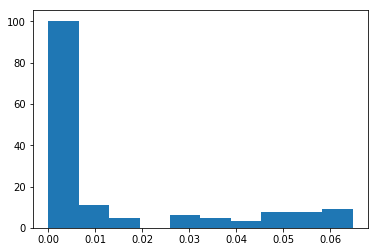

In [160]:
plt.figure()
#plt.plot(L, P_L)
plt.hist(ran, density=True)